### **JPMorgan Chase & Co - Quantitative Research**
### Task One - Commodities markets and data analysis
---

We are given a file *Nat_Gas.csv* containing data about the market price of natural gas at the end of each calendar month. We must analyse the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. Ultimately, our code must take a date as an input and return a price estimate.

We will specifically include the consideration of seasonal differentials in our analysis.

In [1]:
# Load Libreries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

C:\Users\brand\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\brand\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# Import data
Nat_gas = pd.read_csv("Nat_gas.csv",index_col=0)

We inspect a sample of the data to see the types of figures we are working with

In [3]:
Nat_gas.tail(10)

Prices
Dates           
12/31/23    12.8
1/31/24     12.6
2/29/24     12.4
3/31/24     12.7
4/30/24     12.1
5/31/24     11.4
6/30/24     11.5
7/31/24     11.6
8/31/24     11.5
9/30/24     11.8

In [4]:
Nat_gas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 10/31/20 to 9/30/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0+ bytes


Indeed, we have $48$ entries corresponding to $48$ months worth of data spanning from 31st October 2020 to 30th September 2024. Let us plot the prices across time to see the general pattern.

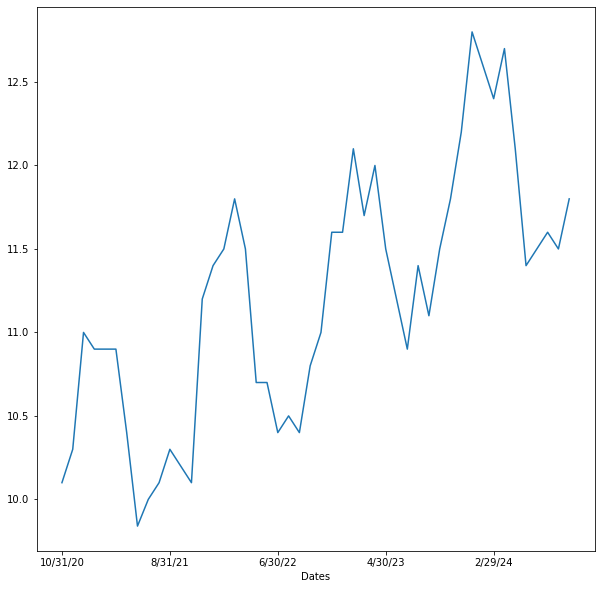

In [5]:
ax=Nat_gas["Prices"].plot(figsize=(10,10))

In [6]:
print(Nat_gas.index)

Index(['10/31/20', '11/30/20', '12/31/20', '1/31/21', '2/28/21', '3/31/21',
       '4/30/21', '5/31/21', '6/30/21', '7/31/21', '8/31/21', '9/30/21',
       '10/31/21', '11/30/21', '12/31/21', '1/31/22', '2/28/22', '3/31/22',
       '4/30/22', '5/31/22', '6/30/22', '7/31/22', '8/31/22', '9/30/22',
       '10/31/22', '11/30/22', '12/31/22', '1/31/23', '2/28/23', '3/31/23',
       '4/30/23', '5/31/23', '6/30/23', '7/31/23', '8/31/23', '9/30/23',
       '10/31/23', '11/30/23', '12/31/23', '1/31/24', '2/29/24', '3/31/24',
       '4/30/24', '5/31/24', '6/30/24', '7/31/24', '8/31/24', '9/30/24'],
      dtype='object', name='Dates')


We observe the prices are at their peaks in a given year during the cold months and at their lowest during the hotter months. Let us smooth this curve our by applying a simple moving average using time windows of 3 months and 12 months.

In [7]:
Nat_gas["SMA_3"]=Nat_gas.Prices.rolling(3).mean()
Nat_gas["SMA_12"]=Nat_gas.Prices.rolling(12).mean()

In [8]:
Nat_gas

Prices      SMA_3     SMA_12
Dates                                 
10/31/20   10.10        NaN        NaN
11/30/20   10.30        NaN        NaN
12/31/20   11.00  10.466667        NaN
1/31/21    10.90  10.733333        NaN
2/28/21    10.90  10.933333        NaN
3/31/21    10.90  10.900000        NaN
4/30/21    10.40  10.733333        NaN
5/31/21     9.84  10.380000        NaN
6/30/21    10.00  10.080000        NaN
7/31/21    10.10   9.980000        NaN
8/31/21    10.30  10.133333        NaN
9/30/21    10.20  10.200000  10.411667
10/31/21   10.10  10.200000  10.411667
11/30/21   11.20  10.500000  10.486667
12/31/21   11.40  10.900000  10.520000
1/31/22    11.50  11.366667  10.570000
2/28/22    11.80  11.566667  10.645000
3/31/22    11.50  11.600000  10.695000
4/30/22    10.70  11.333333  10.720000
5/31/22    10.70  10.966667  10.791667
6/30/22    10.40  10.600000  10.825000
7/31/22    10.50  10.533333  10.858333
8/31/22    10.40  10.433333  10.866667
9/30/22    10.80  10.566667  10.916667
10/31/22   11.00  10.733333  10.991667
11/30/22   11.60  11.133333  11.025000
12/31/22   11.60  11.400000  11.041667
1/31/23    12.10  11.766667  11.091667
2/28/23    11.70  11.800000  11.083333
3/31/23    12.00  11.933333  11.125000
4/30/23    11.50  11.733333  11.191667
5/31/23    11.20  11.566667  11.233333
6/30/23    10.90  11.200000  11.275000
7/31/23    11.40  11.166667  11.350000
8/31/23    11.10  11.133333  11.408333
9/30/23    11.50  11.333333  11.466667
10/31/23   11.80  11.466667  11.533333
11/30/23   12.20  11.833333  11.583333
12/31/23   12.80  12.266667  11.683333
1/31/24    12.60  12.533333  11.725000
2/29/24    12.40  12.600000  11.783333
3/31/24    12.70  12.566667  11.841667
4/30/24    12.10  12.400000  11.891667
5/31/24    11.40  12.066667  11.908333
6/30/24    11.50  11.666667  11.958333
7/31/24    11.60  11.500000  11.975000
8/31/24    11.50  11.533333  12.008333
9/30/24    11.80  11.633333  12.033333

Now visualising the data using a simple moving average, we obtain the follNat_gas.loc[:,["Prices","SMA_3","SMA_12"]].plot(figsize=(10,10))
plt.legend(loc="upper left",fontsize=8)
plt.show()owing.

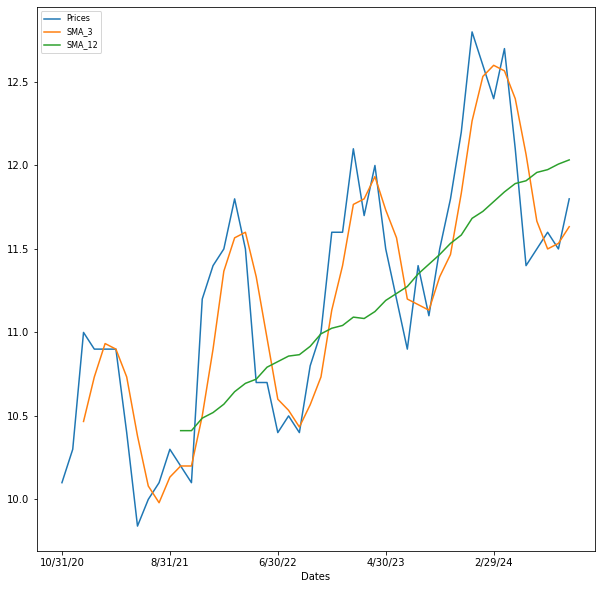

In [9]:
Nat_gas.loc[:,["Prices","SMA_3","SMA_12"]].plot(figsize=(10,10))
plt.legend(loc="upper left",fontsize=8)
plt.show()

So with seasonal decreases considered, the general pattern is the price of natural gas is increasing across the years suggesting a higher demand. Let us quantify time with an incrementor.

In [10]:
time = np.arange(1, len(Nat_gas) + 1)
Nat_gas['time'] = time
data = Nat_gas[['time', 'Prices']]
data.tail()

time  Prices
Dates                
5/31/24    44    11.4
6/30/24    45    11.5
7/31/24    46    11.6
8/31/24    47    11.5
9/30/24    48    11.8

Let us now use the method of least squares to fit the data to an optimal linear equation. This is a form of regression.

In [11]:
reg = np.polyfit(data['time'], data["Prices"], deg = 1)

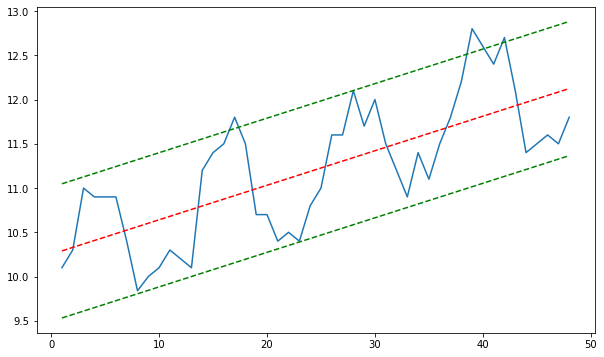

In [12]:
trend = np.polyval(reg, data['time'])
std = data['Prices'].std()
plt.figure(figsize=(10,6))
plt.plot(data['time'].values, data['Prices'].values)
plt.plot(data['time'].values, trend, 'r--')
plt.plot(data['time'].values, trend - std, 'g--')
plt.plot(data['time'].values, trend + std, 'g--');

The following module allows us to break apart a time-series data into its main components by separating distinct parts (here they would be the differences caused by seasonal changes).

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
result = seasonal_decompose(Nat_gas['Prices'], model='multiplicative',period = 12)

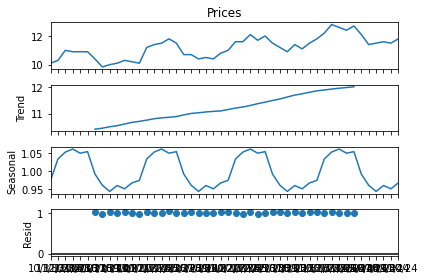

In [15]:
result.plot()
plt.show()

This can be seen as a better way to see the general trend whilst accounting for seasonal changes as we did earlier using a simple moving average. The *seasonal* and *trend* plots are given below in more detail.

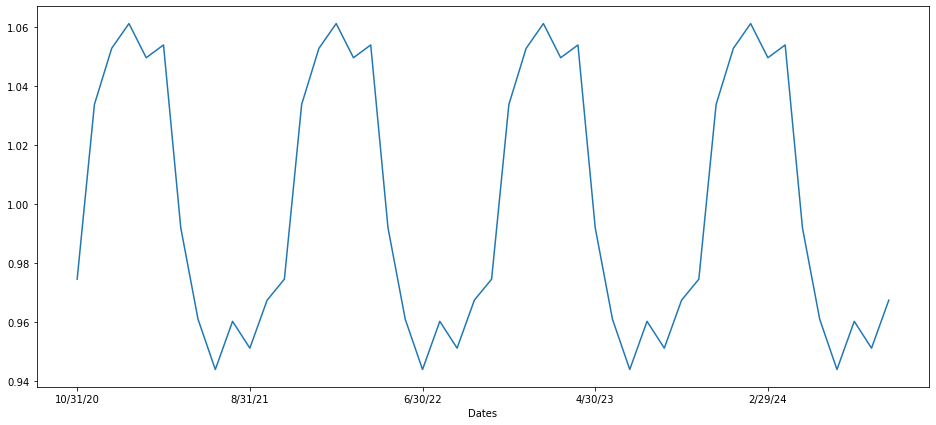

In [16]:
plt.figure(figsize = (16,7))
result.seasonal.plot();

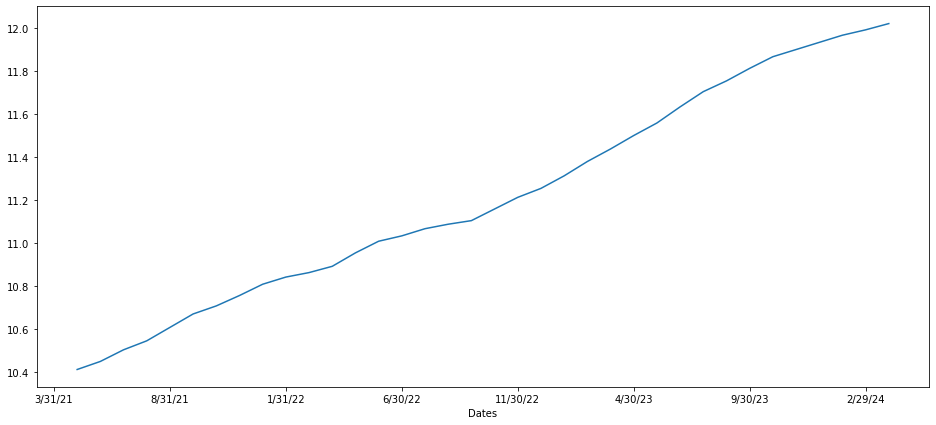

In [17]:
plt.figure(figsize = (16,7))
result.trend.plot();

We have identified that the main trend in this data is seasonal price fluctuations and a general increasing trend. Therefore, based on our analysis thus far it makes sense to apply a **Seasonal Autoregressive Integrated Moving Average** to this dataset, to predict and forecast into the future.

# SARIMA (Seasonal Autoregressive Integrated Moving Average) Forecasting

We use a specific moving average suitable for this dataset as previously mentioned, to forecast the natural gas price into the future.

In [18]:
# Import data
Nat_gas_df = pd.read_csv("Nat_gas.csv")

In [19]:
Nat_gas_df.head()

Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9

The following is a package for a SARIMA model

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
# Convert Month into Datetime
Nat_gas_df['Dates']=pd.to_datetime(Nat_gas_df['Dates'])

C:\Users\brand\AppData\Local\Temp/ipykernel_35224/2162568752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Nat_gas_df['Dates']=pd.to_datetime(Nat_gas_df['Dates'])


In [22]:
Nat_gas_df.head()

Dates  Prices
0 2020-10-31    10.1
1 2020-11-30    10.3
2 2020-12-31    11.0
3 2021-01-31    10.9
4 2021-02-28    10.9

Let us index this dataset by date as oppose to some entry ID.

In [23]:
Nat_gas_df.set_index('Dates',inplace=True)

In [24]:
Nat_gas_df.head()

Prices
Dates             
2020-10-31    10.1
2020-11-30    10.3
2020-12-31    11.0
2021-01-31    10.9
2021-02-28    10.9

Recall our raw data looks as follows

<AxesSubplot:xlabel='Dates'>

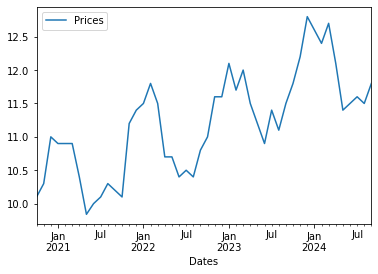

In [25]:
Nat_gas_df.plot()

We test for stationarity, areas of the time-series graph where there is no clear trend, in otherwords there is no *seasonality*.

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
test_result=adfuller(Nat_gas_df['Prices'])

In [28]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Prices):
    result=adfuller(Prices)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [29]:
adfuller_test(Nat_gas_df['Prices'])

ADF Test Statistic : 0.21807686170000096
p-value : 0.9732574388448694
#Lags Used : 10
Number of Observations Used : 37
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


We need to identify the most optimal model that fits the given data. We run an iterative process which convergently becomes more accurate over iterations and allows us to forecast the future.

In [30]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [31]:
#Let's run auto_arima() function to get best p,d,q,P,D,Q values

pm.auto_arima(Nat_gas_df['Prices'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4,
               trace=True,error_action='ignore', suppress_warnings=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=36.756, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=48.334, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=38.394, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.336, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46.741, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=39.804, Time=0.57 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=38.999, Time=1.11 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=38.671, Time=1.10 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=36.053, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=53.197, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=53.566, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=53.701, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=53.674, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=51.953,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -12.027
Date:                Fri, 12 Jul 2024   AIC                             36.053
Time:                        21:20:33   BIC                             47.154
Sample:                    10-31-2020   HQIC                            40.231
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0096      0.007      1.283      0.199      -0.005       0.024
ar.L1          1.6938      0.048     35.239      0.000       1.600       1.788
ar.L2         -0.9603      0.046    -21.097      0.000      -1.050      -0.871
ma.L1         -1.8100      0.298     -6.075      0.000      -2.394      -1.226
ma.L2          0.9557      0.329      2.903      0.004       0.310       1.601
sigma2         0.0870      0.030      2.925      0.003       0.029       0.145
===================================================================================
Ljung-Box (L1) (Q):                   6.36   Jarque-Bera (JB):                 2.30
Prob(Q):                              0.01   Prob(JB):                         0.32
Heteroskedasticity (H):               0.87   Skew:                             0.50
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We are going to split our dataset into two halves, the first a training set and the second a test set.

In [34]:
train_data = Nat_gas_df[:len(Nat_gas_df)-12]
test_data = Nat_gas_df[len(Nat_gas_df)-12:]

We are going to use our ARIMA model on our training set so that it can forecast the future.

arima_model = SARIMAX(train_data['Prices'], order = (2,1,2), seasonal_order = (1,1,1,12))
arima_result = arima_model.fit()
arima_result.summary()

We can now make a good prediction for the price of natural gas at any given time.

In [38]:
arima_pred = arima_result.predict(start = len(train_data), end = len(Nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")

Let us compare our trained models prediction with our test data to check.

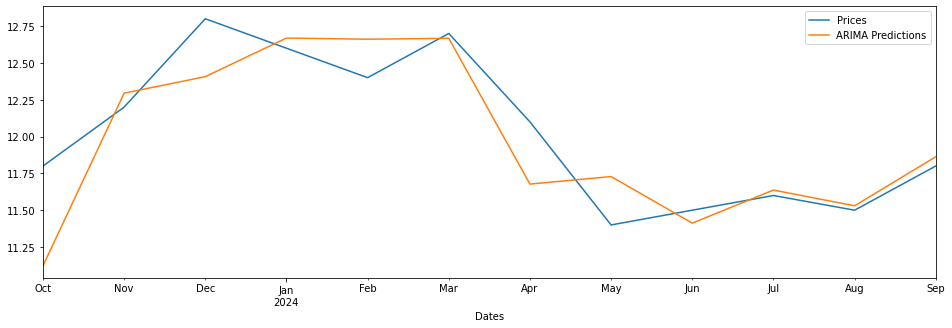

In [40]:
test_data['Prices'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [41]:
test_data['ARIMA_Predictions'] = arima_pred

C:\Users\brand\AppData\Local\Temp/ipykernel_35224/3839166069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


In [ ]:
test_data

Prices  ARIMA_Predictions
Dates                                
2023-10-31    11.8          11.122277
2023-11-30    12.2          12.294596
2023-12-31    12.8          12.406874
2024-01-31    12.6          12.669043
2024-02-29    12.4          12.661031
2024-03-31    12.7          12.667294
2024-04-30    12.1          11.677436
2024-05-31    11.4          11.728597
2024-06-30    11.5          11.412169
2024-07-31    11.6          11.636891
2024-08-31    11.5          11.529989
2024-09-30    11.8          11.862939

Let us compare the errors between our predicted model and the true dataset. We import some tools to do so, specifically one to compute the mean squared error (MSE) and root mean squared error (RMSE).

In [44]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [45]:
arima_rmse_error = rmse(test_data['Prices'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = Nat_gas_df['Prices'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 0.08310425388878488
RMSE Error: 0.28827808430192
Mean: 11.207083333333332


# Predicting the market price of natural gas for any given date

In [47]:
arima_pred_full = arima_result.predict(start = 0, end = len(Nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")

C:\Users\brand\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [50]:
#enter Month and year in following format 'yyyy/mm/dd' -- KEEP day at end of the month AND THEN Run the ENTIRE code
#example : userdate = 2024-05-31
userdate = '2024-05-31'
arima_pred_full.loc[userdate]

11.728597340205322

Finally, we may extrapolate $1$ year into the future. We choose a date and then run our ARIMA model to predict $12$ months into the future.

In [70]:
#enter Month and year in following format 'yyyy/mm/dd' -- KEEP day at end of the month AND THEN Run the ENTIRE code
#example : userdate = 2024-05-31
userdate = '2024-5-31'
start = Nat_gas_df.index.get_loc(userdate)
arima_pred_future = arima_result.predict(start = start, end = start+12, typ="levels").rename("ARIMA Predictions")

C:\Users\brand\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


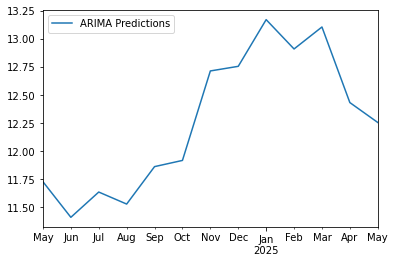

In [71]:
arima_pred_future.plot(legend = True);